In [1]:
from datetime import datetime
from data.DataManager import DataManager
from structures.CNN import CNN
from structures.functions import sigmoid, d_sigmoid, same, d_same
from structures.layers.DenseLayer import DenseLayer

In [2]:
dm = DataManager()

In [3]:
nn = CNN()
nn.add_layer(DenseLayer(784, 500, sigmoid, d_sigmoid, alpha=0.01))
nn.add_layer(DenseLayer(500, 100, sigmoid, d_sigmoid, alpha=0.02))
nn.add_layer(DenseLayer(100, 10, same, d_same, alpha=0.01))

In [4]:
curtime = datetime.now()
nn.train(dm.train_set[:5000], epochs=20, epoch_range=1)
t = datetime.now() - curtime
print('{} seconds for training'.format(t.seconds))
print('correct for {} on test set%'.format(nn.calculate_correct(dm.test_set)))

Training starts
epoch:1, correct for 65.85%
epoch:2, correct for 75.02%
epoch:3, correct for 78.29%
epoch:4, correct for 81.46%
epoch:5, correct for 82.53%
epoch:6, correct for 83.78%
epoch:7, correct for 85.71%
epoch:8, correct for 86.09%
epoch:9, correct for 86.12%
epoch:10, correct for 86.38%
epoch:11, correct for 86.49%
epoch:12, correct for 88.30%
epoch:13, correct for 88.70%
epoch:14, correct for 88.95%
epoch:15, correct for 89.31%
epoch:16, correct for 88.87%
epoch:17, correct for 89.35%
epoch:18, correct for 89.96%
epoch:19, correct for 89.99%
epoch:20, correct for 90.07%
333 seconds for training
correct for 87.84010483850011 on test set%


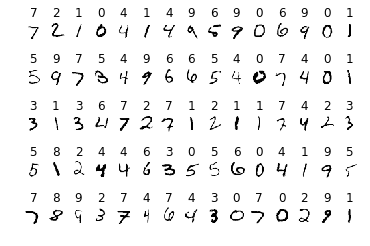

In [5]:
results = []
for x, y in dm.test_set[:75]:
    res = nn.feed_forward(x)
    res = dm.classify(res)
    results.append((x.reshape((28, 28)), res))
results = list(zip(*results))
dm.draw_image(*results, (5, 15))